# Regresion Polinomial

* Ajusta una funcion polinomial segun los datos
* Tiende a sobreajustarse, se debe revisar si la funcion si cumple con la tendencia de lso datos en los extremos
* La funcion es muy sensible a datos atipicos

In [1]:
#Importando librerias 
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn import linear_model
from sklearn.model_selection import train_test_split

In [13]:
#IMPORTANDO LOS DATOS
casas = pd.read_csv("C:/Users/Arley/Desktop/AMachine Learning/Modelos MachineLearning/Regresiones Lineales y Polinomiales/Regresion Polinomial/train.csv", sep=",")
casas.head()

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,...,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
0,1,60,RL,65.0,8450,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,2,2008,WD,Normal,208500
1,2,20,RL,80.0,9600,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,5,2007,WD,Normal,181500
2,3,60,RL,68.0,11250,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,9,2008,WD,Normal,223500
3,4,70,RL,60.0,9550,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,2,2006,WD,Abnorml,140000
4,5,60,RL,84.0,14260,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,12,2008,WD,Normal,250000


In [81]:
#SELECCIONAMOS LOS Dtaos
x_data = casas["LotFrontage"] #LotFrontage : Pies lineales de calle conectados a la propiedad
y_data = casas["SalePrice"] #Precio de Venta

x_data

0       65.0
1       80.0
2       68.0
3       60.0
4       84.0
        ... 
1455    62.0
1456    85.0
1457    66.0
1458    68.0
1459    75.0
Name: LotFrontage, Length: 1460, dtype: float64

In [82]:
#RECTIFICANDO QUE NO FALTEN DATOS
print(x_data.shape, y_data.shape) #Los datos estan completos de registros

x_data.info() #se observa que solo hay 1201 datos faltan los demas hasta completar 1460

(1460,) (1460,)
<class 'pandas.core.series.Series'>
RangeIndex: 1460 entries, 0 to 1459
Series name: LotFrontage
Non-Null Count  Dtype  
--------------  -----  
1201 non-null   float64
dtypes: float64(1)
memory usage: 11.5 KB


In [83]:
x_data.isnull().values.sum() #Se muestran los datos faltantes 

259

## Llenamos los valores con la media

In [84]:
prom_edad = round(x_data.mean()) #Se uso un metodo propio de Python
x_data = x_data.replace(np.nan, prom_edad) #NO OLVIDAR ACTUALIZAR LA INSTANCIA PARA QUE GUARDE CAMBIOS

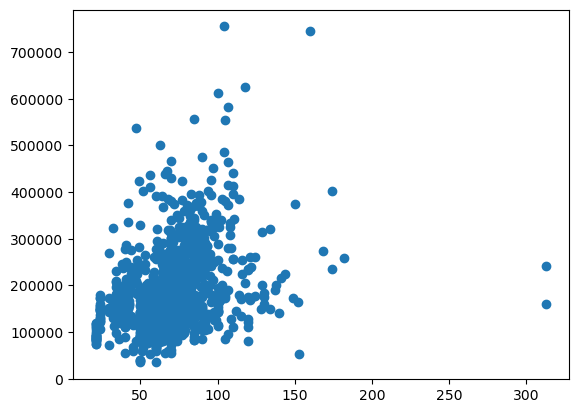

In [85]:
#GRAFICANDO LAS VARIABLES
plt.scatter(x_data, y_data)

# Separando Datos de Prueba

In [86]:
from sklearn.model_selection import train_test_split

In [203]:
x_train, x_test, y_train, y_test = train_test_split(x_data, y_data, test_size=0.5)

In [204]:
#Modificando los datos ya que el modelo lo pide en mas de una dimension [[1D],[2D]]
x_graf = x_test
y_graf = y_test

x_train = np.array(x_train)
y_train = np.array(y_train)
x_test = np.array(x_test)
y_test = np.array(y_test)

x_train = x_train.reshape(-1,1)
y_train = y_train.reshape(-1,1)
x_test = x_test.reshape(-1,1)
y_test = y_test.reshape(-1,1)

In [205]:
#Creamos un Dataset con los valores a graficar
grafica = pd.DataFrame({"x_test":x_graf, "y_test":y_graf})
#grafica

# Generando el Modelo

In [206]:
from sklearn.preprocessing import PolynomialFeatures

In [207]:
#Se define el grado del algoritmo
poli_reg = PolynomialFeatures(degree=2)

In [208]:
#Se calculan las potencias del polinomio para los datos en X, X^n+1
x_train_poli = poli_reg.fit_transform(x_train)
x_test_poli = poli_reg.fit_transform(x_test)

## Defino el Modelo

In [209]:
pr = linear_model.LinearRegression()

## Entrenando el Modelo

In [210]:
pr.fit(x_train_poli, y_train)

LinearRegression()

## Se Realiza la predicción

In [211]:
y_predict = pr.predict(x_test_poli)

In [212]:
#AÑADIMOS LOS DATOS AL DATASET PARA GRAFICAR
grafica["y_predict"] = y_predict
grafica.sort_values(by="x_test")

,x_test,y_test,y_predict
363,21.0,118000,100380.586924
227,21.0,106000,100380.586924
655,21.0,88000,100380.586924
500,21.0,113000,100380.586924
235,21.0,89500,100380.586924
...,...,...,...
197,174.0,235000,324172.862906
231,174.0,403000,324172.862906
1127,182.0,259000,333210.897576
1298,313.0,160000,443553.376356


# Graficando los valores

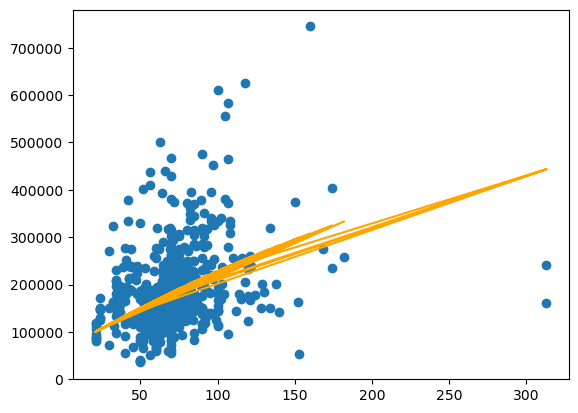

In [213]:
plt.scatter(grafica["x_test"],grafica["y_test"])
plt.plot(grafica["x_test"],grafica["y_predict"], color="orange")


# Definiendo la Ecuacion y su error

In [214]:
pr.coef_ 
pr.intercept_

array([62107.70322185])

In [215]:
pr.score(x_train_poli, y_train) # Los datos estan muy dispersos no es bueno estealgoritmo para ello

0.1504687047997968